In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [15]:
df=pd.read_csv('winequality-red.csv')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [17]:
df.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [18]:
df.duplicated().sum()

np.int64(240)

In [19]:
df.drop_duplicates(inplace=True)

In [20]:
df.duplicated().sum()

np.int64(0)

In [21]:
df.select_dtypes([float,int]).columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

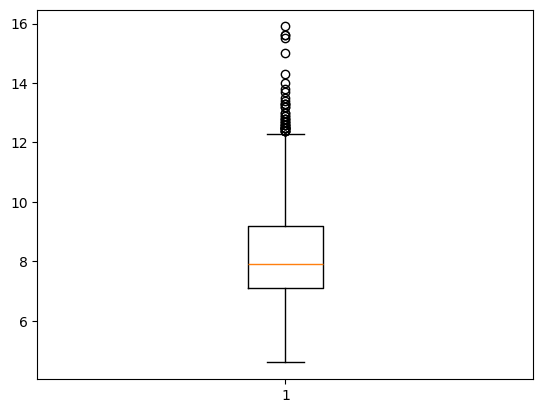

In [22]:
plt.boxplot(df["fixed acidity"])
plt.show()

In [23]:
df["fixed acidity"].describe()

,fixed acidity
count,1359.000000
mean,8.310596
std,1.736990
min,4.600000
25%,7.100000
50%,7.900000
75%,9.200000
max,15.900000


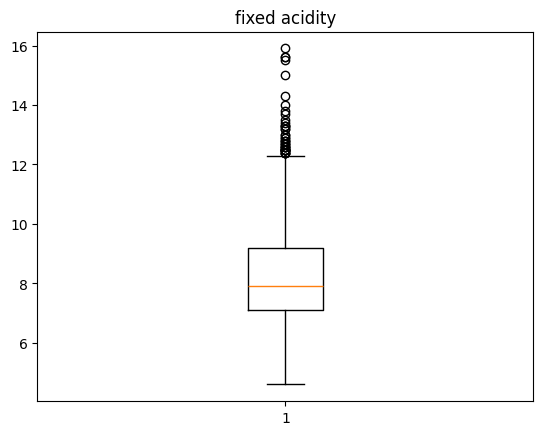

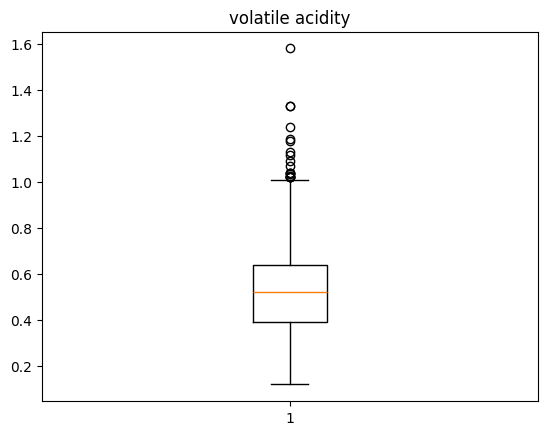

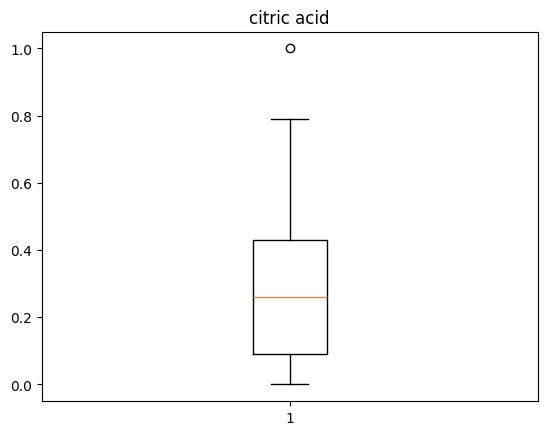

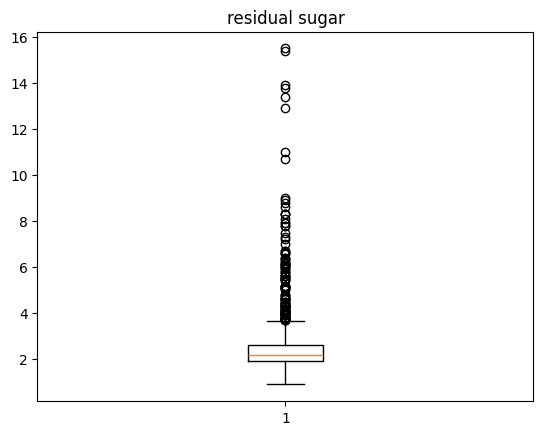

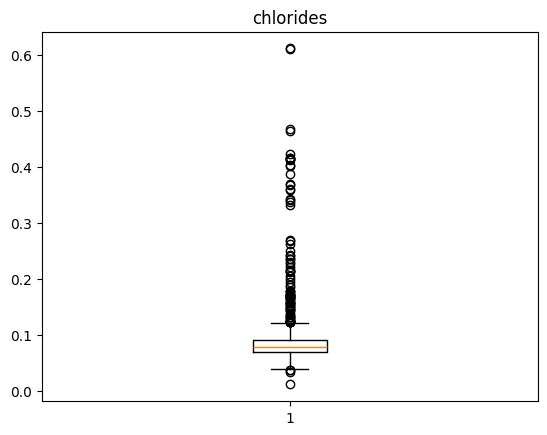

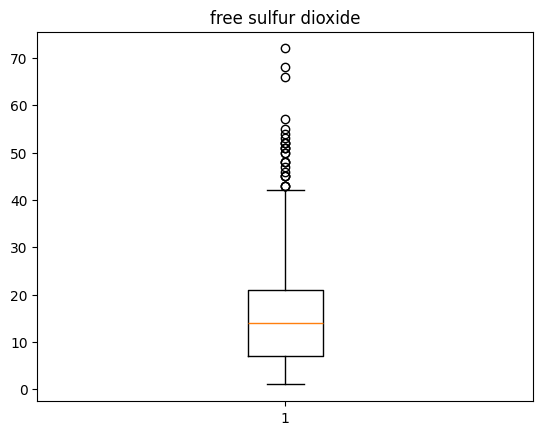

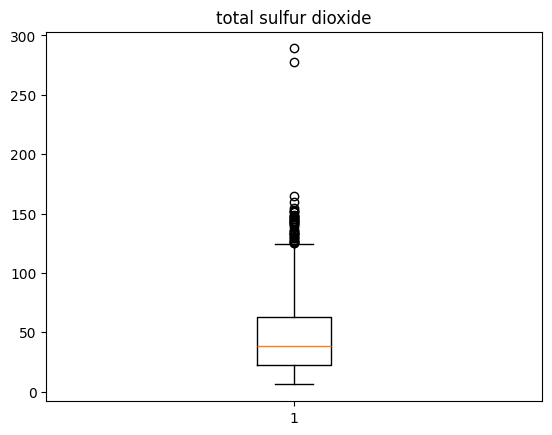

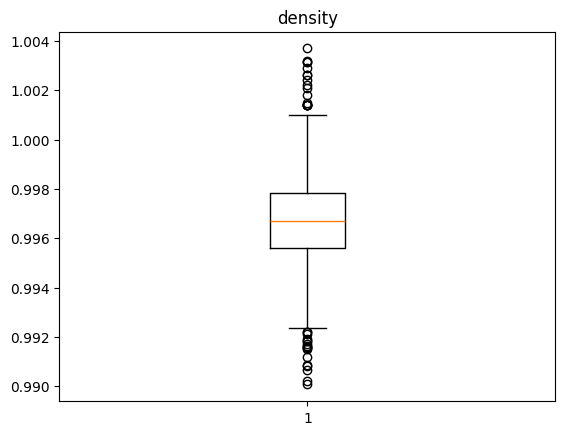

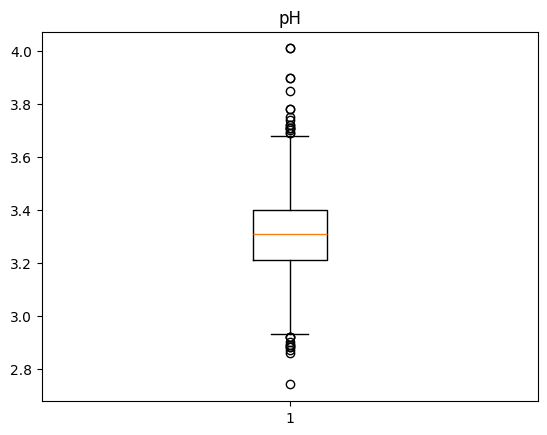

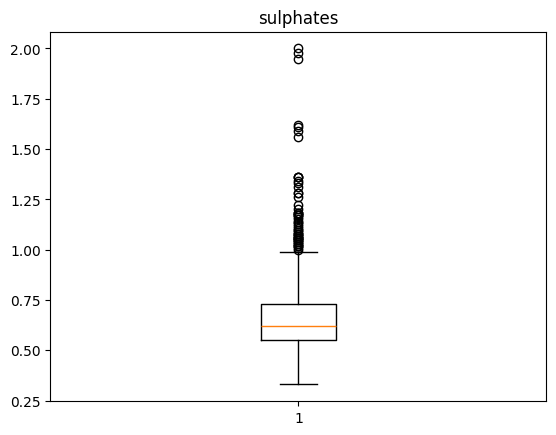

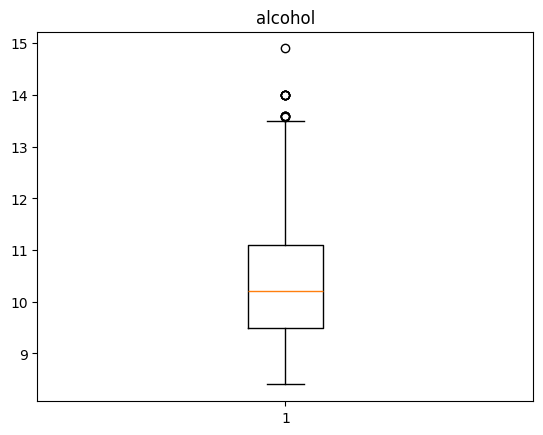

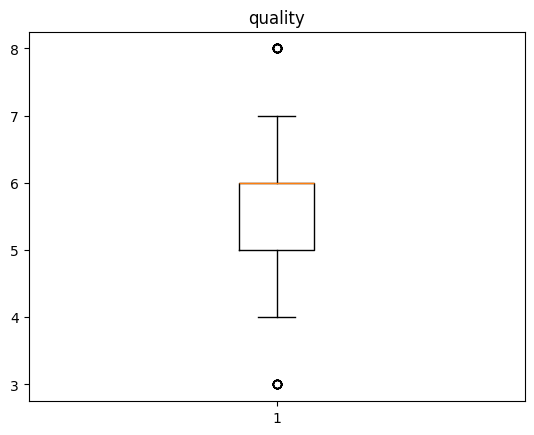

In [24]:
for i in df.select_dtypes([float,int]).columns:
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()

In [25]:
df['quality']=np.where(df['quality']==3,4,df['quality'])
df['quality']=np.where(df['quality']==8,7,df['quality'])

In [26]:
df['quality'].value_counts().sort_values()

,count
quality,
4,63
7,184
6,535
5,577


In [27]:

for i in df.select_dtypes([float,int]).columns:
  q1=df[i].quantile(0.25)
  q3=df[i].quantile(0.75)
  iqr=q3-q1
  lf=q1-(1.5*iqr)
  uf=q3+(1.5*iqr)
  df[i]=np.where(df[i]>uf,uf,df[i])
  df[i]=np.where(df[i]<lf,lf,df[i])

In [28]:
from sklearn.model_selection import train_test_split


In [29]:
x = df.drop(columns=['quality'])
y = df['quality']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=88)

In [30]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [31]:
lr=LinearRegression()

In [32]:
lr.fit(x_train,y_train)


LinearRegression()

In [33]:
lr.score(x_train,y_train)

0.3849683657419214

In [34]:
from sklearn.metrics import mean_squared_error,root_mean_squared_error

In [35]:
print("MSE",mean_squared_error(y_test,lr.predict(x_test)))
print("RMSE",root_mean_squared_error(y_test,lr.predict(x_test)))

MSE 0.38409376576922644
RMSE 0.6197529877049617


In [36]:
actual=y_train
pred=lr.predict(x_train)

In [37]:
error=actual - pred
sq_error=np.square(error)
MSE=np.mean(sq_error)
print(MSE)

0.3716557795617836


In [38]:
actual=y_test
pred=lr.predict(x_test)

In [39]:
error=actual-pred
sq_error=np.square(error)
test_mse=np.mean(sq_error)
test_rmse=np.sqrt(test_mse)
print("MSE",test_mse)
print("RMSE",test_rmse)

MSE 0.38409376576922644
RMSE 0.6197529877049617


In [40]:
actual=y_train
pred=lr.predict(x_train)

In [41]:
avg=np.mean(y_train)
actual=y_train
error=actual-avg
avg_mse=np.mean(np.square(error))


In [42]:
(avg_mse-MSE)/avg_mse

np.float64(0.3849683657419214)

In [43]:
lr.predict(x_train)

array([6.77554571, 4.97350177, 6.00098516, 5.58462972, 6.14411895,
       5.63848008, 5.96555064, 6.39793953, 5.23194518, 5.11642716,
       5.14068732, 5.17454812, 5.90048638, 4.66956059, 5.43363256,
       4.98195364, 6.53985962, 5.58909929, 6.06570104, 6.06156142,
       6.32105403, 5.99653352, 5.39101666, 5.65951333, 6.12822621,
       6.19610203, 5.4638449 , 5.46205473, 5.17858566, 5.55678961,
       6.61043811, 5.9995531 , 5.46403607, 5.92863198, 5.55477005,
       5.98884963, 5.02843564, 5.52069196, 5.2416591 , 5.25438849,
       5.4456158 , 5.10448721, 5.73237884, 5.34216095, 5.39271405,
       5.8180125 , 5.60329387, 5.40750635, 5.28393958, 5.88832618,
       5.28746605, 5.36537606, 5.56442706, 6.06975072, 5.16890206,
       5.43034155, 6.26812025, 5.36764038, 5.82276933, 5.9344619 ,
       5.06648605, 5.59177804, 6.10554805, 5.5559021 , 5.76463244,
       5.35813989, 5.47222837, 5.6195832 , 6.11282883, 5.3836609 ,
       5.03370492, 5.53827006, 5.23303666, 5.02864878, 6.58476

In [44]:
x_train.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [46]:
smaple={'fixed acidity':[7.8],
        'volatile acidity':[0.6],
        'citric acid':[0.5],
        'residual sugar':[1.8],
         'chlorides':[0.2], 'free sulfur dioxide':[6],
        'total sulfur dioxide':[25], 'density':[0.99],
        'pH':[3.8], 'sulphates':[0.87], 'alcohol':[9.8]}
sap= pd.DataFrame(smaple)

In [47]:
lr.predict(sap)

array([5.45382634])

coffectient value

In [48]:
lr.coef_

array([ 5.20199095e-02, -1.11993358e+00, -2.83820483e-01,  6.92118647e-04,
       -1.81455347e+00,  2.15675032e-03, -2.39861485e-03, -2.12725821e+01,
       -9.59529146e-02,  1.25533169e+00,  2.64706999e-01])

its the constent value

In [49]:
lr.intercept_

np.float64(24.008841394724328)

In [52]:
manual_prediction = (
    sap["fixed acidity"] * lr.coef_[0] +
    sap["volatile acidity"] * lr.coef_[1] +
    sap["citric acid"] * lr.coef_[2] +
    sap["residual sugar"] * lr.coef_[3] +
    sap["chlorides"] * lr.coef_[4] +
    sap["free sulfur dioxide"] * lr.coef_[5] +
    sap["total sulfur dioxide"] * lr.coef_[6] +
    sap["density"] * lr.coef_[7] +
    sap["pH"] * lr.coef_[8] +
    sap["sulphates"] * lr.coef_[9] +
    sap["alcohol"] * lr.coef_[10] +
    lr.intercept_
)
print(manual_prediction)

0    5.453826
dtype: float64
